In [1]:

import pylab as pl
import numpy as np
from tabulate import tabulate

pima = np.loadtxt('Week1/pima-indians-diabetes.data',delimiter=',')

# Plot the first and second values for the two classes
indices0 = np.where(pima[:,8]==0)
indices1 = np.where(pima[:,8]==1)

pl.ion()
pl.plot(pima[indices0,0],pima[indices0,1],'go')
pl.plot(pima[indices1,0],pima[indices1,1],'rx')
pl.show()

trainin = pima[::2,:8]
testin = pima[1::2,:8]
traintgt = pima[::2,8:9]
testtgt = pima[1::2,8:9]
print(tabulate(pima[0:20:2,:9]))


FileNotFoundError: Week1/pima-indians-diabetes.data not found.

In [ ]:
# Custom activation function
from keras.layers import Activation
from keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import tensorflow as tf
import numpy as np

def custom_activation(x):
  result1 = tf.cast(tf.math.greater(x, 0), tf.float32)
  return result1

get_custom_objects().update({'custom_activation': Activation(custom_activation)})
eta=0.001
x=[[-1.0]]*32
Theta=tf.constant(x, dtype=tf.float32)


class CustomModel(tf.keras.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.mse_metric = tf.keras.metrics.MeanSquaredError(name="mse")

    def train_step(self, data):
      # Unpack the data. Its structure depends on your model and
      # on what you pass to `fit()`.
      x, y = data
      with tf.GradientTape() as tape:
          y_pred = self(x, training=True)  # Forward pass
          # Compute the loss value
          # (the loss function is configured in `compile()`)
          loss = tf.keras.losses.mean_squared_error(y, y_pred)

      # Compute gradients
      Xupdates = -eta*K.dot(K.transpose(x),y_pred-y)
      Thetaupdates = -eta*K.dot(K.transpose(Theta),y_pred-y)
      Thetaupdates = tf.reshape(Thetaupdates, shape=(1,))
      self.trainable_variables[0].assign( self.trainable_variables[0]+Xupdates)
      self.trainable_variables[1].assign( self.trainable_variables[1]+Thetaupdates)

      # Compute our own metrics
      self.loss_tracker.update_state(loss)
      self.mse_metric.update_state(y, y_pred)
      return {"loss": self.loss_tracker.result(), "mse": self.mse_metric.result()}

    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [self.loss_tracker, self.mse_metric]

'''
# Usage
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation(custom_activation, name='SpecialActivation'))
'''

"\n# Usage\nmodel = Sequential()\nmodel.add(Dense(32, input_dim=784))\nmodel.add(Activation(custom_activation, name='SpecialActivation'))\n"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

print(trainin.shape)
# Create a Sequential model
# Construct an instance of CustomModel
inputs = Input(shape=(8,))
outputs = Dense(1, activation = custom_activation )(inputs)
model = CustomModel(inputs, outputs)


# Print the model summary
model.summary()

model.compile( loss="mse", metrics=["mse"] )


history= model.fit(x=trainin, y=traintgt,  epochs=1000, verbose=2)
print(history.history)
print(model.metrics_names)
print(model.metrics)
for metric in model.metrics:
  print(metric.name)


(384, 8)
Model: "custom_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________
Epoch 1/1000
12/12 - 0s - loss: 0.4609 - mse: 0.4609 - 155ms/epoch - 13ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.4297 - mse: 0.4297 - 25ms/epoch - 2ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.4531 - mse: 0.4531 - 26ms/epoch - 2ms/step
Epoch 4/1000
12/12 - 0s - loss: 0.4688 - mse: 0.4688 - 24ms/epoch - 2ms/step
Epoch 5/1000
12/12 - 0s - loss: 0.4505 - mse: 0.4505 - 24ms/epoch - 2ms/step
Epoch 6/1000
12/12

[0.4609375, 0.4296875, 0.453125, 0.46875, 0.4505208432674408, 0.3854166567325592, 0.4505208432674408, 0.4140625, 0.3932291567325592, 0.4401041567325592, 0.4427083432674408, 0.421875, 0.3958333432674408, 0.4401041567325592, 0.4114583432674408, 0.4505208432674408, 0.4010416567325592, 0.4713541567325592, 0.4348958432674408, 0.4296875, 0.4270833432674408, 0.4947916567325592, 0.375, 0.4114583432674408, 0.3984375, 0.46875, 0.4296875, 0.4401041567325592, 0.421875, 0.4192708432674408, 0.4010416567325592, 0.4010416567325592, 0.4322916567325592, 0.4713541567325592, 0.4010416567325592, 0.4713541567325592, 0.4270833432674408, 0.3828125, 0.4401041567325592, 0.4166666567325592, 0.4609375, 0.4427083432674408, 0.390625, 0.4661458432674408, 0.4401041567325592, 0.4270833432674408, 0.4921875, 0.40625, 0.4140625, 0.4296875, 0.3802083432674408, 0.4557291567325592, 0.4453125, 0.4583333432674408, 0.4088541567325592, 0.4427083432674408, 0.4635416567325592, 0.4088541567325592, 0.4479166567325592, 0.4375, 0.432

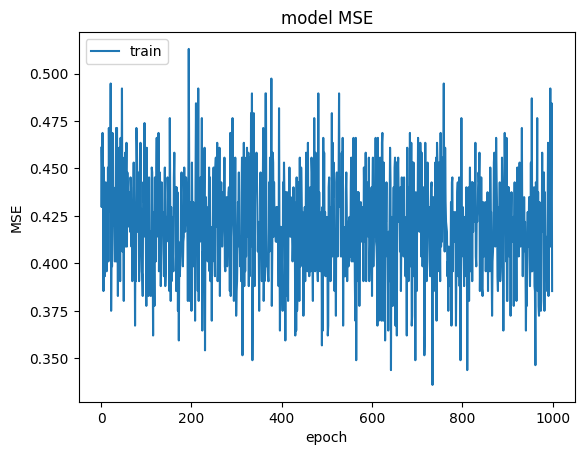

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
print(history.history['loss'])
print(list(history.history['mse']))
plt.plot(history.history['mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:

#前置處理
pima[np.where(pima[:,0]>8),0] = 8

pima[np.where(pima[:,7]<=30),7] = 1
pima[np.where((pima[:,7]>30) & (pima[:,7]<=40)),7] = 2
pima[np.where((pima[:,7]>40) & (pima[:,7]<=50)),7] = 3
pima[np.where((pima[:,7]>50) & (pima[:,7]<=60)),7] = 4
pima[np.where(pima[:,7]>60),7] = 5

pima[:,:8] = pima[:,:8]-pima[:,:8].mean(axis=0)
pima[:,:8] = pima[:,:8]/pima[:,:8].var(axis=0)


trainin = pima[::2,:8]
testin = pima[1::2,:8]
traintgt = pima[::2,8:9]
testtgt = pima[1::2,8:9]


<ipython-input-58-1592db001a16>:11: RuntimeWarning: invalid value encountered in divide
  pima[:,:8] = pima[:,:8]/pima[:,:8].var(axis=0)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

print(trainin.shape)
# Create a Sequential model
# Construct an instance of CustomModel
inputs = Input(shape=(8,))
outputs = Dense(1, activation = custom_activation )(inputs)
model = CustomModel(inputs, outputs)


# Print the model summary
model.summary()

model.compile( loss="mse", metrics=["mse"] )


history= model.fit(x=trainin, y=traintgt,  epochs=1000, verbose=2)
print(history.history)
print(model.metrics_names)
print(model.metrics)
for metric in model.metrics:
  print(metric.name)


(384, 8)
Model: "custom_model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________
Epoch 1/1000
12/12 - 0s - loss: 0.3516 - mse: 0.3516 - 99ms/epoch - 8ms/step
Epoch 2/1000
12/12 - 0s - loss: 0.3516 - mse: 0.3516 - 27ms/epoch - 2ms/step
Epoch 3/1000
12/12 - 0s - loss: 0.3516 - mse: 0.3516 - 18ms/epoch - 1ms/step
Epoch 4/1000
12/12 - 0s - loss: 0.3516 - mse: 0.3516 - 20ms/epoch - 2ms/step
Epoch 5/1000
12/12 - 0s - loss: 0.3516 - mse: 0.3516 - 19ms/epoch - 2ms/step
Epoch 6/1000
12/12 -

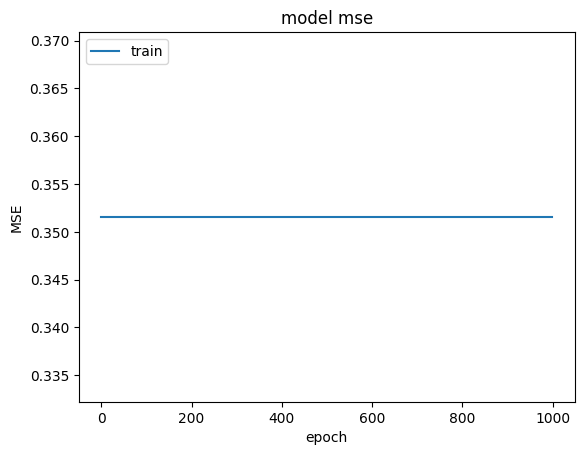

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.title('model mse')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()